# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt

from utils.custom_classes.data_loader import CompasWithoutSensitiveAttrsDataset
from utils.model_tuning_utils import *
from configs.config import *

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [6]:
DATASET_NAME = "COMPAS_Without_Sensitive_Attributes"

## Loading ACSEmployment data

In [7]:
dataset = CompasWithoutSensitiveAttrsDataset("./data/COMPAS.csv")

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)
X_train_features.columns:  Index(['age_cat_Less than 25_0', 'age_cat_25 - 45_1',
       'age_cat_Greater than 45_0', 'age_cat_Less than 25_1',
       'c_charge_degree_M_0', 'juv_fel_count', 'c_charge_degree_M_1',
       'juv_other_count', 'age_cat_Greater than 45_1', 'c_charge_degree_F_0',
       'c_charge_degree_F_1', 'juv_misd_count', 'priors_count',
       'age_cat_25 - 45_0'],
      dtype='object')
2023/01/16, 17:52:12: Tuning LogisticRegression...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
2023/01/16, 17:52:14: Tuning for LogisticRegression is finished
####################  COMPAS_Without_Sensitive_Attributes  ####################
Test model:  LogisticRegression
Test model parameters:
{'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}

              precision    recall  f1-score   support

           0      0.707     0.732     0.719       585
           1      0.652     0.624     0.638   

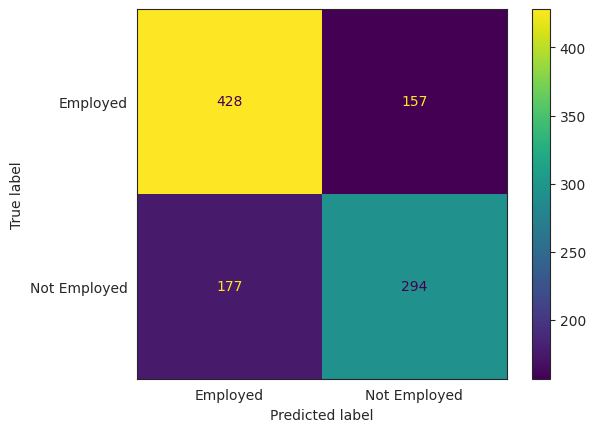

2023/01/16, 17:52:15: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
2023/01/16, 17:52:15: Tuning for DecisionTreeClassifier is finished
####################  COMPAS_Without_Sensitive_Attributes  ####################
Test model:  DecisionTreeClassifier
Test model parameters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.6}

              precision    recall  f1-score   support

           0      0.738     0.477     0.579       585
           1      0.549     0.790     0.648       471

    accuracy                          0.616      1056
   macro avg      0.643     0.633     0.613      1056
weighted avg      0.654     0.616     0.610      1056



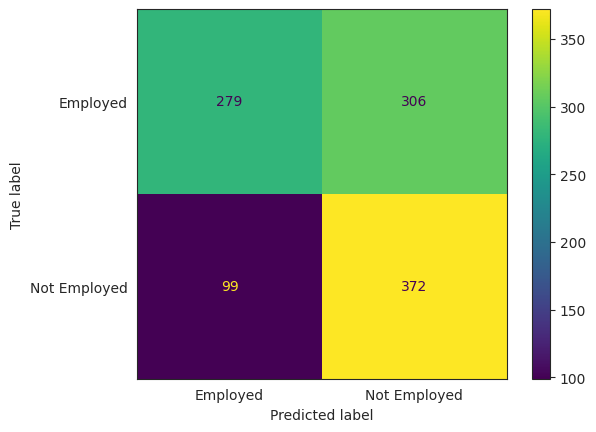

2023/01/16, 17:52:15: Tuning RandomForestClassifier...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3; 2/50] START max_iter=50, penalty=none, solver=lbfgs....................
[CV 1/3; 2/50] END max_iter=50, penalty=none, solver=lbfgs; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.0s
[CV 1/3; 6/50] START max_iter=50, penalty=l2, solver=newton-cg..................
[CV 1/3; 6/50] END max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.0s
[CV 1/3; 7/50] START max_iter=50, penalty=l2, solver=lbfgs......................
[CV 1/3; 7/50] END max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.0s
[CV 3/3; 7/50] START max_iter=50, penalty=l2, solver=lbfgs......................
[CV 3/3; 7/50] END max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.645) F1_Score: (test=0.638) total time=   0.0s
[CV 3/3; 9/50] START max_iter=50, pe

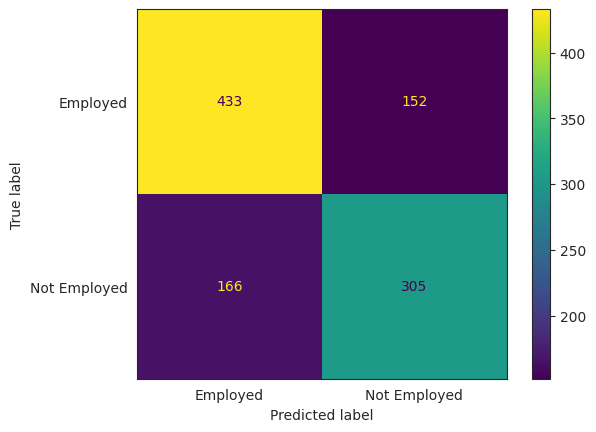

2023/01/16, 17:52:31: Tuning XGBClassifier...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 3/3; 68/144] START max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/3; 68/144] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.658) F1_Score: (test=0.654) total time=   0.5s
[CV 1/3; 79/144] START max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50
[CV 1/3; 79/144] END max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50; Accuracy_Score: (test=0.639) F1_Score: (test=0.637) total time=   0.5s
[CV 2/3; 79/144] START max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50
[CV 2/3; 79/144] END max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50; Accuracy_Score: (test=0.663) F1_Score: (test=0.661) total time=   0.3s
[CV 1/3; 85/144] START max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/3; 85/144] END max_depth=6, max_features=au

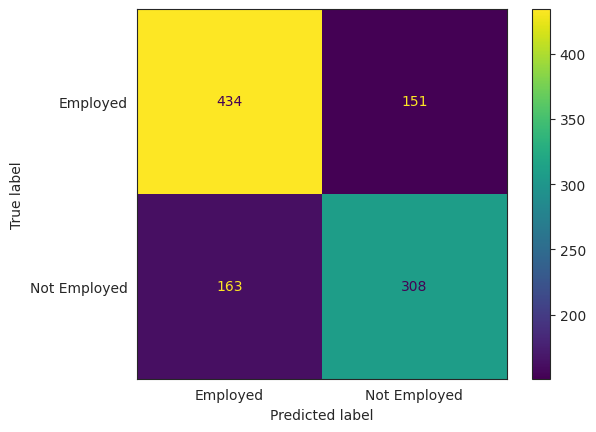

2023/01/16, 17:52:38: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 92/144] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.650) F1_Score: (test=0.646) total time=   0.5s
[CV 1/3; 99/144] START max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/3; 99/144] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.638) F1_Score: (test=0.636) total time=   0.3s
[CV 2/3; 99/144] START max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/3; 99/144] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.657) F1_Score: (test=0.655) total time=   0.2s
[CV 1/3; 105/144] START max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 1/3; 105/144] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10; Accuracy_Score: (test=0.634) F1_Scor

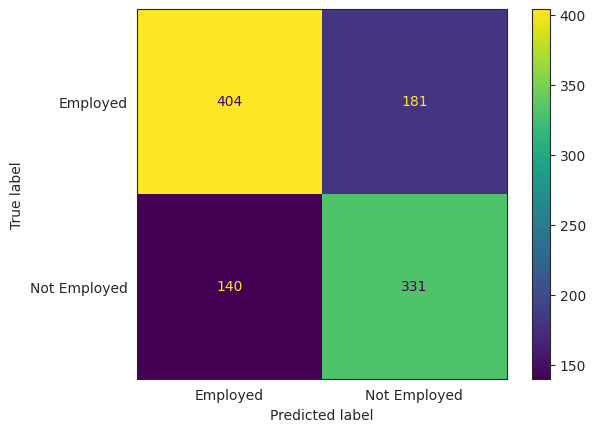

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,COMPAS_Without_Sensitive_Attributes,LogisticRegression,0.678536,0.683712,"{'max_iter': 50, 'penalty': 'l2', 'solver': 'n..."
1,COMPAS_Without_Sensitive_Attributes,DecisionTreeClassifier,0.613479,0.616477,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
2,COMPAS_Without_Sensitive_Attributes,RandomForestClassifier,0.694373,0.698864,"{'max_depth': 4, 'max_features': 0.6, 'min_sam..."
3,COMPAS_Without_Sensitive_Attributes,XGBClassifier,0.698357,0.702652,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,COMPAS_Without_Sensitive_Attributes,KNeighborsClassifier,0.694563,0.696023,"{'metric': 'manhattan', 'n_neighbors': 15, 'we..."


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,COMPAS_Without_Sensitive_Attributes,XGBClassifier,0.698357,0.702652,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...","[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: LogisticRegression
{'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


Model name: DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.6}


Model name: RandomForestClassifier
{'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 50}


Model name: XGBClassifier
{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic'}


Model name: KNeighborsClassifier
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", index=False, columns=ML_baseline_results_df.columns, float_format="%.4f")